# Práctica III - Análisis numérico

## Equipo:
<ul>
<li> López Espíndola Luis Enrique
<li> Mucio Alvarez Santos
<li> Muñiz Lescale Marco Aurelio
<li> Reynoso Sánchez Arturo Yitzack
</ul>

### Preliminares 


In [ ]:
# Excepciones

class sslException(Exception):

    def __init__(self, valor):
        self.valor = str(valor)

    def __str__(self):
        errores = {"0": "Las dimensiones son diferentes. La matriz debe ser cuadrada.",
                   "1": "Los elementos de la diagonal son cero. La matriz no es invertible.",
                   "2": "Los elementos de la diagonal son cero.",
                   "3": "Los elementos de la diagonal deben ser positivos."}
        if self.valor in errores:
            return f"Error {self.valor}. {errores[self.valor]}"
        else:
            return "Error no clasificado"


# <FONT COLOR="blue">Ejercicio 23</FONT>

a) Resolver el siguiente problema de mínimos cuadrados usando cualquier método de los vistos en clase.
$$\left(\begin{array}{cc} 0.16 & 0.10 \\
0.17 & 0.11 \\
20.02 & 1.29\end{array}\right) \left(\begin{array}{c} x_1\\ y_1\end{array}\right)  \approx  \left(\begin{array}{c} 0.26\\ 0.28\\3.31\end{array}\right)$$

b) Resolver el mismo problema con la siguiente perturbación en el vector $\overline{b}$,
$$\overline{b}= \left(\begin{array}{c} 0.27\\ 0.25\\3.33\end{array}\right)$$
c) Compara los resultados de los incisos anteriores, ¿se puede explicar la diferencia entre ellos?


In [ ]:
import numpy as np

def sustDelante(L, b):
    n=len(L)
    y=np.empty_like(b)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i]
        for j in range(0,i):
            y[i] -= L[i][j]*y[j]
    return y

def sustAtras(U, y):
    n=len(U)
    x=np.empty_like(y)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= U[i][j]*x[j]
        x[i] /= U[i][i]
    return x

def cholesky(mat):
    L = np.zeros_like(mat)
    #Creamos un for que vaya de 0 al numero de renglones de la matriz.
    for k in range(len(mat)):
        #Creamos un for para ir sumando.
        for i in range(k):
            suma = mat[k,i]
            for j in range(i):
                suma -= (L[i,j]* L[k,j])
            L[k,i] = (suma)/ L[i,i]
            L[i,k] = L[k,i]
        suma = mat[k,k]
        for j in range(k):
            suma -= (L[k,j]*L[k,j])
        L[k,k] = np.sqrt(suma)
    return L

# funcion que calcula los coeficientes alfa y betha
def minimos(A,b):
    At = A.T
    # ecuaciones normales
    aprim = np.matmul(At,A)
    bprim = np.matmul(At,b)
    # utilizando cholesky 
    L = cholesky(aprim)
    y = sustDelante(L, bprim)
    x = sustAtras(L, y)
    # vector solucion del sistema de ecuaciones normales
    return x

#Se define el conjunto de datos que seran ajustados
mat = np.array([[0.16 ,0.10],[0.17 , 0.11],[20.02 , 1.29]])
b = np.array([0.26,0.28,3.31])
b_1 = np.array([0.27,0.25,3.33])
#Se calculan los coeficientes de la recta que ajusta los datos
x = minimos(mat, b)
z = minimos(mat, b_1)
# se imprimen los coeficientes alfa y betha que ajustan la recta
print(x)
print(z)



[  42.60845481 -609.08654005]
[  42.86446328 -612.74755855]


# <FONT COLOR="blue">Ejercicio 24</FONT>

Ejercicio 3.5. Heath M. Scientific Computing págs. 153-154. Inciso a y b.


In [ ]:
import matplotlib.pyplot as plt
datos = np.array([[1,1.02],[1,0.95],[1,0.87],[1,0.77],[1,0.67],[1,0.56],[1,0.44],[1,0.30],[1,0.16],[1,0.01]])
b = np.array([0.39,0.32,0.27,0.22,0.18,0.15,0.13,0.12,0.13,0.15])
coef = minimos(datos, b)
print(coef)

[ 1.94792595 -2.25477696]


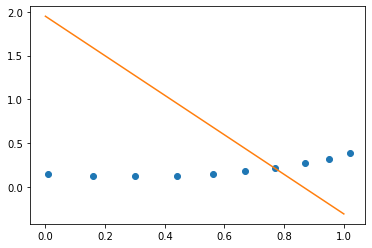

In [ ]:
cord_x = [1.02,0.95,0.87,0.77,0.67,0.56,0.44,0.30,0.16,0.01]
cord_y = [0.39,0.32,0.27,0.22,0.18,0.15,0.13,0.12,0.13,0.15]
eje_x = np.linspace(0,1,100)
y=1.94792595 -2.25477696*eje_x
plt.plot(cord_x,cord_y,"o")
plt.plot(eje_x,y)

plt.show()

# <FONT COLOR="blue">Ejercicio 25</FONT>

Para mostrar la diferencia numérica entre el método de Ecuaciones Normales y la factorización $QR$ se requiere un problema de mínimos cuadrados que sea mal condicionado. Para ello consideremos el ajuste del siguiente polinomio de grado $n-1$, 

$p_{n-1}(t) = x_1 + x_2t + x_3t^2 + \cdots + x_nt^{n-1}$

para $m$ datos $(t_i, y_i), m>n$. Elegimos $t_i = (i-1)/(m-1), i=1,.., m$. Los valores para $y_i$ serán los dados al evaluar el polinomio con las $t_i$ dadas previamente y tomando $x_j = 1$ para $j=1,..,n$, se quiere ver si se pueden recuperar los valores de las $x_j$ con los métodos estudiados.

Primero se genera una perturbación para los valores $y_i$ dado por 

$y_i = y_i + (2u_i - 1)*\epsilon, \;$ $i=1,...,m$

con $u_i \in [0,1]$ números aleatorios. Usar $m=21 \; n=12$ y $\epsilon=10^{-10}$.

Después de generar la lista de datos $(t_i,y_i)$ se comparan los dos métodos para ajustar el polinomio. Primero, formar el Sistema de Ecuaciones Normales para el problema y resolver por la Factorización de Cholesky. Segundo utilizar algún método para factorizar la matriz en una $QR$ y resolver.

<ol type="a">
<li>¿Para cuál de los métodos la solución es más sensible a la perturbación generada?</li>
<li>¿Cuál de los métodos está más próximo a tener la solución exacta dada por $x_i=1$?</li>
<li>¿La diferencia en las soluciones afecta en el ajuste de puntos $(t_i,y_i)$ por el polinomio, por qué?</li>
</ol>

Argumentar todas las respuestas con los resultados de ambos métodos.

**Respuesta**: Generamos los valores de $y_i$ originales. Para ello,generamos los valores $t_i$ y las perturbaciones $u_i$.


las perturbaciones para los valores $y_i$.

In [ ]:

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# Factorización de Cholesky
def chol(M):
    m,n = M.shape
    if m != n:
        raise sslException(0)
    L = np.zeros(M.shape,dtype = "float64")
    for k in range(n):
        s = 0.0
        for r in range(k):
            s += L[k,r]**2
        L[k,k] = np.sqrt(M[k,k] - s)
        for j in range(k+1,n):
            s = 0.0
            for r in range(k):
                s += L[j,r]*L[k,r]
            L[j,k] = (M[j,k] - s)/L[k,k]
    return L

# Sistema triangular inferior
def STI(L,rhs):
    m,n = L.shape
    if m != n:
        raise sslException(0)
    b = rhs.copy()
    x = np.empty((n,),dtype = "float64")
    for j in range(n):
        if L[j,j] == 0:
             raise sslException(1)
        x[j] = b[j]/L[j,j]
        for i in range(j+1,n):
            b[i] = b[i] - L[i,j]*x[j]
    return x

# Sistema triangular superior
def STS(U,rhs):
    m,n = U.shape
    if m != n:
        raise sslException(0)
    b = rhs.copy()
    x = np.zeros(b.shape,dtype = "float64")
    for j in reversed(range(n)):
        if U[j,j] == 0:
            raise sslException(1)
        else:
            x[j] = b[j]/U[j,j]
            for i in range(j):
                b[i] = b[i] - U[i,j]*x[j]
    return x


u = random.rand(21)
t = np.zeros(21)


for i in range(21):
  t[i] = ((i+1)-1)/(21 - 1)

## La matriz de vandermonde para el vector t
A = np.vander(t,12, increasing=True)

# Generamos el vector y dado por la ecuación polinomial, que en 
# nuestro caso es dado un renglón en A, sumamos los elementos de las diferentes 
# columnas del renglón de A. 
# Obtenemos un vector con tamaño 21. 
yreal = np.sum(A, axis = 1)
print(yreal)


# Generamos el vector y con perturbaciones. 
epsilon = 10**(-10)
yperturbado = yreal + (2*u-1)*epsilon

[ 1.          1.05263158  1.11111111  1.17647059  1.24999999  1.33333325
  1.42857067  1.53845634  1.6666387   1.81805645  1.99951172  2.22051952
  2.49455804  2.8408914   3.28719571  3.87329459  4.65640262  5.71838829
  7.17570464  9.19279825 12.        ]


El sistema lineal $A^{\intercal}A\pmb{x} = A^{\intercal}\pmb{y}$ es comunmente conocido como sistema de **ecuaciones normales**.

dado que $A^{\intercal}A$ es una matriz simétrica definida positiva, podemos aplicar la factorización de Cholesky de modo tal que
$$
    LL^{\intercal} = A^{\intercal}A
$$
donde $L$ es una matriz triangular inferior.

De tal manera que se resuelvan los sistemas
$$
    L\pmb{w} = A^{\intercal}\pmb{y}\quad\text{y}\quad L^{\intercal}\pmb{x} = \pmb{w}
$$
para obtener el vector de parámetros $\pmb{x}$

In [ ]:
L = chol(A.T@A)
with np.printoptions(precision=4, suppress=True):
    print(L)

x_ec = STS(L.T,STI(L,yperturbado@A))
print(x_ec)

[[4.5826 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [2.2913 1.3874 0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [1.5657 1.3874 0.3744 0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [1.2029 1.2688 0.5617 0.0987 0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.9856 1.1502 0.6492 0.1973 0.0256 0.     0.     0.     0.     0.
  0.     0.    ]
 [0.841  1.0487 0.687  0.2764 0.0641 0.0066 0.     0.     0.     0.
  0.     0.    ]
 [0.738  0.9644 0.6994 0.3359 0.1055 0.0197 0.0017 0.     0.     0.
  0.     0.    ]
 [0.661  0.8944 0.6985 0.3796 0.145  0.0373 0.0058 0.0004 0.     0.
  0.     0.    ]
 [0.6013 0.8358 0.6906 0.4115 0.1807 0.0573 0.0124 0.0016 0.0001 0.
  0.     0.    ]
 [0.5537 0.7864 0.6793 0.4347 0.2119 0.0781 0.0211 0.0039 0.0005 0.
  0.     0.    ]
 [0.5149 0.7442 0.6664 0.4514 0.2388 0.0986 0.0312 0.0073 0.0012 0.0001
  0.     0.    ]
 [0.4828 0.7078 0.653  0.4633 0.2619 0.1184 0.0423 0.0117 0.0

Ahora vamos a a realizar el ajuste usando la transformación de Householder. 

In [ ]:
def qr_Householder(A):
    m,n = A.shape
    Q = np.eye(m)
    R = np.array(A,dtype = "float64")
    for k in range(n):
        v = np.copy(R[k:,k])
        alfa = -np.sign(v[0])*np.linalg.norm(v)
        v -= alfa*canonico(v.size)
        v /= np.linalg.norm(v)        
        Q_hh = np.eye(v.size) - 2*(v.reshape(v.size,1)@v.reshape(1,v.size))
        R[k:,k:] = Q_hh@R[k:,k:]
        Q[:,k:] = Q[:,k:]@Q_hh
    return Q,R

Q_hh, R_hh = qr_Householder(A)

# Se resuelve el sistema triangular y se muestra la solucion
x_hh = STS(R_hh[:3,:3],yperturbado@Q_hh[:,:3])
x_hh = STS(R_hh[:12,:12],yperturbado@Q_hh[:,:12])
print(x_hh)


x_original = np.ones(12) 
norm_ec = np.linalg.norm(x_original-x_ec)
norm_hh = np.linalg.norm(x_original-x_hh)
print(norm_ec)
print(norm_hh)

# b) 
# El método con mejor ajuste es el de Transformación de Householder, al tener
# el vector diferencia con la solución original (vector de unos) menor. 

[1.         1.         0.99999984 1.00000185 0.99998968 1.00002926
 0.99996388 0.99998673 1.00010094 0.99986941 1.00007533 0.99998308]
0.18509262774538646
0.0001888130915334838


# <FONT COLOR="blue">Ejercicio 26</FONT>

Resolver
<ol type="a">
<li> Implementar los métodos de Gram-Schmidt Clásico y Modificado para generar la matriz ortogonal $Q$ cuyas columnas forman una base ortogonal para el espacio columna de la Matriz $H$ de Hilbert cuyas entras están dadas por
$$
  h_{i,j} = \frac{1}{i+j-1}, \hspace{1cm} n=2,...,12
$$

Como la medida de calidad en los resultados (específicamente la pérdida de ortogonalidad), graficar la cantidad
$$
  -\log_{10}(\vert\vert I-Q^tQ \vert\vert) \hspace{3cm}(2)
$$
la cual puede ser interpretada como los "dígitos de precisión", para cada método como función de n.

Como tercer método de comparación, dada la matriz $Q$ obtenida del procedimiento Clásico de Gram-Schmidt, volver a calcular una nueva $Q$ con la anterior, es decir, aplicar dos veces el método clásico. Graficar con $(2)$ la medida de ortogonalidad creada.

¿Cómo pueden compararse los 3 métodos en rapidez, almacenamiento y exactitud?
<li> Repetir a) usando la factorización de Householder para poner $H=QR$. Calcular la cantidad pedida en la ecuación $(2)$ y comparar nuevamente con los anteriores.
<li> Una manera de calcular una base ortogonal es usando las ecuaciones normales. Al formar la matriz de las ecuaciones normales y calcular su factorización de Cholesky $A^tA = LL^t$, tenemos que $Q=AL^t$ es ortogonal y su espacio columna es el mismo que el de $A$. Repetir el procedimiento alterior usando la matriz $Q$ obtenida arriba. Graficar los resultados comparando con los obtenidos por Gram-Schmidt.
<li> ¿Se puede dar una explicación de la calidad de los resultados obtenidos por los distintos métodos?
</ol>

### Solución:

In [ ]:
import numpy as np
from numpy import linalg
from scipy.linalg import hilbert
import matplotlib.pyplot as plt

# Funciones auxiliares
def canonico(n,j = 1):
    x,indx = np.zeros((max(1,n),)),0
    if j >= 0 and j <= n:
        indx = j-1
    x[indx] = 1.0
    return x

# Factorización Gram-Schmidt Clásico
def qr_GramSchmidt(A):
    m,n = A.shape
    Q = np.empty((m,n),dtype = "float64")
    R = np.zeros((n,n))
    for k in range(n): # sobre las columnas
        Q[:,k] = np.copy(A[:,k])
        for j in range(k):
            R[j,k] = Q[:,j].T@A[:,k]
            Q[:,k] -= R[j,k]*Q[:,j] # componentes
        R[k,k] = np.linalg.norm(Q[:,k])
        Q[:,k] /= R[k,k] # normalizar
    return Q  # ,R  # solo regrsamos Q

# Factorización Gram-Schmidt Modificado
def qr_GramSchmidt_Mod(A):
    m,n = A.shape
    Q = np.empty((m,n),dtype = "float64")
    R = np.zeros((n,n))
    for k in range(n): # sobre las colunas
        Q[:,k] = np.copy(A[:,k])
        R[k,k] = np.linalg.norm(Q[:,k])
        Q[:,k] = Q[:,k]/R[k,k] # normalizar
        for j in range(k+1,n):
            R[k,j] = Q[:,k].T@Q[:,j]
            Q[:,j] -= R[k,j]*Q[:,k] # componentes
    return Q  # ,R  # solo regrsamos Q

# Factorización Householder
def qr_Householder(A):
    m,n = A.shape
    Q = np.eye(m)
    R = np.array(A,dtype = "float64")
    for k in range(n): # sobre las columnas
        v = np.copy(R[k:,k])
        alfa = -np.sign(v[0])*np.linalg.norm(v)
        v -= alfa*canonico(v.size)
        v /= np.linalg.norm(v)        
        Q_hh = np.eye(v.size) - 2*(v.reshape(v.size,1)@v.reshape(1,v.size)) # convertimos a vectores fila y columna (vector oeseholder)
        R[k:,k:] = Q_hh@R[k:,k:]
        Q[:,k:] = Q[:,k:]@Q_hh
    return Q #,R  # solo regresamos Q

In [ ]:
n = range(2,13) # dimensión de la matriz de Hilbert
pc1 = [] # digitos de presición aplicando una vez Gram-Schmidt Clásico a la matriz de Hilbert
pc2 = [] # digitos de presición aplicando dos veces Gram-Schmidt Clásico a la matriz de Hilbert
pm = [] # digitos de presición aplicando Gram-Schmidt Modificado a la matriz de Hilbert
ph = [] # digitos de presición aplicando Householder a la matriz de Hilbert
pc = [] # digitos de presición aplicando Cholesky a la matriz de Hilbert

### a)

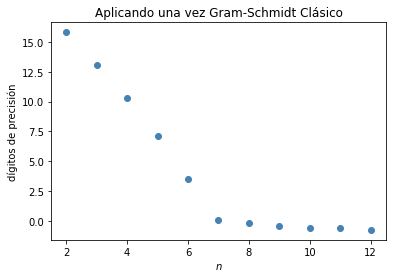

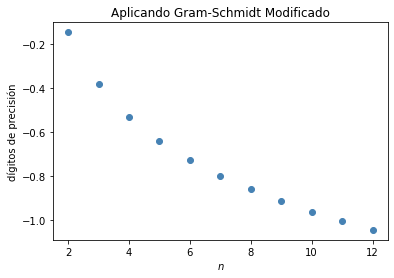

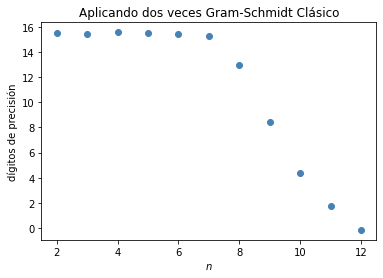

In [ ]:
# Aplicando una vez Gram-Schmidt Clásico
for i in n:
  H = hilbert(i) # matriz de Hilbert
  Q = qr_GramSchmidt(H) # aplicamos una vez Gram-Schmidt Clásico
  d = -np.log10( linalg.norm( np.identity(i)-Q.T@Q ) ) # entre más grande sea d, Q es más ortogonal
  pc1.append(d)
# Graficamos
plt.scatter(n,pc1,color = 'steelblue')
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("dígitos de precisión")
plt.title("Aplicando una vez Gram-Schmidt Clásico")
plt.show()

print("\n")
# Aplicando una vez Gram-Schmidt Modificado
for i in n:
  H = hilbert(i) # matriz de Hilbert
  Q = qr_GramSchmidt_Mod(H) # aplicamos Gram-Schmidt Modificado
  d = -np.log10( linalg.norm( np.identity(i)-Q.T@Q ) ) # entre más grande sea d, Q es más ortogonal
  pm.append(d)
# Graficamos
plt.scatter(n,pm,color = 'steelblue')
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("dígitos de precisión")
plt.title("Aplicando Gram-Schmidt Modificado")
plt.show()

print("\n")
# Aplicando dos veces Gram-Schmidt Clásico
for i in n:
  H = hilbert(i) # matriz de Hilbert
  Q = qr_GramSchmidt(qr_GramSchmidt(H)) # aplicamos dos veces Gram-Schmidt Clásico
  d = -np.log10( linalg.norm( np.identity(i)-Q.T@Q ) ) # entre más grande sea d, Q es más ortogonal
  pc2.append(d)
# Graficamos
plt.scatter(n,pc2,color = 'steelblue')
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("dígitos de precisión")
plt.title("Aplicando dos veces Gram-Schmidt Clásico")
plt.show()

#### Comparación:
Del más al menos rápido:

1. Aplicando una vez Gram-Schmidt Clásico
2. Aplicando Gram-Schmidt Modificado
3. Aplicando dos veces Gram-Schmidt Clásico

Del que ocupa más almacenamiento al que ocupa menos:

1. Aplicando dos veces Gram-Schmidt Clásico
2. Aplicando Gram-Schmidt Modificado
3. Aplicando una vez Gram-Schmidt Clásico

Del más exacto al menos exacto:

1. Aplicando dos veces Gram-Schmidt Clásico
2. Aplicando una vez Gram-Schmidt Clásico
3. Aplicando Gram-Schmidt Modificado

### b)

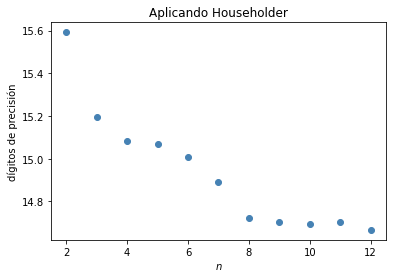

In [ ]:
# Aplicando Householder
for i in n:
  H = hilbert(i) # matriz de Hilbert
  Q = qr_Householder(H) # aplicamos Householder
  d = -np.log10( linalg.norm( np.identity(i)-Q.T@Q ) ) # entre más grande sea d, Q es más ortogonal
  ph.append(d)
# Graficamos
plt.scatter(n,ph,color = 'steelblue')
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("dígitos de precisión")
plt.title("Aplicando Householder")
plt.show()

Observaciones: Notamos que el método de Householder es mucho mejor que todos los anteriores en todos los ámbitos.

### c)

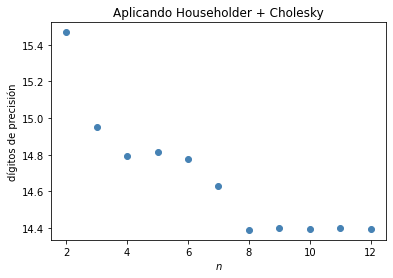

In [ ]:
# Aplicando Householder + Cholesky
for i in n:
  H = hilbert(i) # matriz de Hilbert
  A = qr_Householder(H) # aplicamos Householder
  L = np.linalg.cholesky(A.T@A) # aplicamos Cholesky
  Q = A@L.T # ortogonal
  d = -np.log10( linalg.norm( np.identity(i)-Q.T@Q ) ) # entre más grande sea d, Q es más ortogonal
  pc.append(d)
# Graficamos
plt.scatter(n,pc,color = 'steelblue')
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("dígitos de precisión")
plt.title("Aplicando Householder + Cholesky")
plt.show()

Observaciones: El método de Householder + Cholesky es más efectivo que los de Gram-Schmidt, pero un poco menos efectivo que el de Householder. Además este método de Householder + Cholesky ocupa más memoria y tarda un poco más que todos los anteriores.

### d)

#### Calidad de resultados:

Del más al de menos calidad:
1. Aplicando Householder
2. Aplicando Householder + Cholesky
3. Aplicando dos veces Gram-Schmidt Clásico
4. Aplicando una vez Gram-Schmidt Clásico
5. Aplicando Gram-Schmidt Modificado

En general, el método de Householder tienen una mayor estabilidad numérica que el método de Gram-Schmidt.

$Q$ siempre está cerca de $H$ para todos los métodos.

Sin embargo, su comportamiento es muy diferente a la hora de producir ortogonalidad.

¿Qué tan cerca está $Q*Q^t$ de la identidad?

Gram-Schmidt clásico: Suele tener una ortogonalidad muy pobre.

Gram-Schmidt modificado: En teoría es mejor que el clásico, pero falla completamente cuando la matriz es singular (en este caso la matriz de Hilbert es singular).

Householder: Siempre tiene una buena ortogonalidad.

# <FONT COLOR="blue">Ejercicio 27</FONT>

¿Cuál es la solución exacta al problema de mínimos cuadrados como funcion de ϵ para el siguiente sistema?:
$$\left(\begin{array}{ccc} 1& 1& 1 \\
ϵ& 0& 0 \\
0& ϵ& 0\\
0& 0& ϵ\end{array}\right) \left(\begin{array}{c} x_1\\ x_2\\ x_3\end{array}\right)  \approx  \left(\begin{array}{c} 1\\ 0\\0\\0\end{array}\right)$$

Resolver el problemea de mínimos cuadrados usando cada uno de los métodos listados. Para cada método variar el valor de ϵ tan pequeño como se pueda hasta obtener una solución exacta
Probar explicitamente valores cercanos a 
$$ϵ \approx \sqrtϵ_m \hspace{.5 cm}\wedge \hspace{.5cm} ϵ \approx ϵ_m$$ 

Nota: El profesor comentó en clase que bastaba con aplicar solo los dos valores mencionados arriba para cada uno de los métodos listados, y así lo haremos 


### Solución:

Alrededor de los ejercicios anteriores se definieron las funciones de la mayoría de los métodos solicitados, asi que solo definiremos el método de Givens y una pequeña funcion para el método de ecuaciones normales

Givens: 
Este métedo consistirá de dos funciones, la función principal recibirá como parametro la matriz y relaizará el algoritmo de Givenes visto en clase, y cuando llegtue al puntoi donde necesita definir s y c se apoyara en otra fumcion para definir estos valores 

In [ ]:
from math import copysign, hypot, sqrt

def givens(A):
    # Descomposicion QR usando las rotaciones de Givens 
    (n,m) = np.shape(A)

    # Inicializamos Q y R.
    Q = np.identity(n)
    R = np.copy(A)

    # Iteramos sobre la matriz triangular inferior 
    #Obtenemos los indices de la matriz triangular con la funcion tril_indeces de numpy
    (rows, cols) = np.tril_indices(n, -1, m)
    for (r, cl) in zip(rows, cols):

        # Realizamos la matriz de Rotacion y
        # damos forma a nuestra matriz R.
        if R[r, cl] != 0:
            (c, s) = givens_matriz_r(R[cl, cl], R[r, cl])

            G = np.identity(n)
            G[[cl, r], [cl, r]] = c
            G[r, cl] = s
            G[cl, r] = -s

            R = G@R
            Q = Q@G.T
    return Q, R


def givens_matriz_r(a, b):
    #Definimos las entradas de la matriz de rotacion de givens
    r = hypot(a, b) 
    c = a/r
    s = -b/r

    return (c, s)



Ecuaciones normales: Para este método es vital notar que $A^tA$ es simétrica definida positiva, así que una vez calculada esta matriz podemos aplicar la sustitucion de Cholesky para resolver nuestro problema 

In [ ]:
def ec_normales_vec(A, b):
    L = chol(A.T@A)
    try:
      x = STS(L.T,STI(L,b@A))
      return L, x
    except:
      return L

Por ultimo redefinimos unas funciones que alteramos en el camino 

In [ ]:
#Ahora si dejamos que devuelva Q y R
# Factorización Householder
def qr_Householder(A):
    m,n = A.shape
    Q = np.eye(m)
    R = np.array(A,dtype = "float64")
    for k in range(n): # sobre las columnas
        v = np.copy(R[k:,k])
        alfa = -np.sign(v[0])*np.linalg.norm(v)
        v -= alfa*canonico(v.size)
        v /= np.linalg.norm(v)        
        Q_hh = np.eye(v.size) - 2*(v.reshape(v.size,1)@v.reshape(1,v.size)) # convertimos a vectores fila y columna (transformación)
        R[k:,k:] = Q_hh@R[k:,k:]
        Q[:,k:] = Q[:,k:]@Q_hh # vector householder
    return Q,R  

# Factorización Gram-Schmidt Clásico
def qr_GramSchmidt(A):
    m,n = A.shape
    Q = np.empty((m,n),dtype = "float64")
    R = np.zeros((n,n))
    for k in range(n):
        Q[:,k] = np.copy(A[:,k])
        for j in range(k):
            R[j,k] = Q[:,j].T@A[:,k]
            Q[:,k] -= R[j,k]*Q[:,j]
        R[k,k] = np.linalg.norm(Q[:,k])
        Q[:,k] /= R[k,k]
    return Q,R 

Con nuestros dos últimos métdos ya definidos podemos dar respuesta a nuestro ejercicio, para ello generamos un ciclo con el fin de ahorrar tiempo 


In [ ]:
#Definimos como se imprimira el jale 
np.set_printoptions(precision=4, suppress=True)
#Definimos el epsilon de maquina 
epsilon = np.finfo(float).eps
eps = [epsilon, sqrt(epsilon)]
#Nuestro vector definido 
b = np.array([1,0,0,0])

for e in eps:
  print(f"Para epsilon = {e}, aplicando cada uno de los metodos solicitados tendremos lo siguiente")
  A = np.array([[1, 1, 1],
              [e, 0, 0],
              [0, e, 0],
              [0, 0, e]])
  print(f"A = \n{A}")
  # A) Ecuaciones Normales ---------------------------------------------------
  L = ec_normales_vec(A,b) 
  print("Aplicando el metodo de ecuaciones normales y solucionando"
          +" con la factorizacion de Cholesky tenemos que:",
        f"A^t*A = \n{A.T@A}", f"L = \n{L}",
        "Para resolver el sistema aplicamos Cholesky, arrojandonos que"
        +"\n Desgraciadamente en este caso no hay solucion por los ceros que se forman\n",
        sep="\n\n")
  # B) House Holder ----------------------------------------------------------
  q_hh, r_hh = qr_Householder(A)
  # Resolviendo el sistema
  y = q_hh.T@b
  x = STS(r_hh[:2, :2], y)
  print("Aplicando la factorizacion QR con reflexiones de House Holder tenemos que:",
        f"Q = \n{q_hh}", f"R = \n{r_hh}", f"Entoces \nQR = \n{q_hh@r_hh}",
        f"Comprobando con el modulo numpy, nuetra respuesta es: {np.allclose(q_hh@r_hh,A)}",
        "Para resolver el sistema debemos resolver Q^t*b = y de manera directa y depues utilizar"
        + " sustitucion hacia atras para resolver el sistema Rx = y",
        f"Con Q^t =\n{q_hh.T}", f"Y b = \n{b}", f"Entonces Q^t*b = \n{y}",
        "Resolviendo Rx = y con sustitucion hacia atras tenemos que",  f"x =\n{x}", sep="\n\n")
  # C) Givens ---------------------------------------------------------------
  (Q, R) = givens(A)
  # Resolviendo el sistema
  y = Q.T@b
  x = STS(R[:2, :2], y)

  # Pues con esto imprimimos  el ultimo resultado
  print("Aplicando la factorizacion QR con rotacion de Givens tenemos que:",
        f"Q = \n{Q}", f"R = \n{R}", f"Entoces \nQR = \n{Q@R}",
        f"Comprobando con el modulo numpy, nuetra respuesta es: {np.allclose(Q@R,A)}",
        "Para resolver el sistema debemos resolver Q^t*b = y de manera directa y depues utilizar"
        + " sustitucion hacia atras para resolver el sistema Rx = y",
        f"Con Q^t =  \n{Q.T}", f"Y b = \n{b}", f"Entonces Q^t*b = \n{y}",
        "Resolviendo Rx = y con sustitucion hacia atras tenemos que",  f"x =\n{x}\n\n", sep="\n\n")
 # D) Ortogonalizacion Gram-Schmidt Clasico.----------------------------------------------
  (Q, R) = qr_GramSchmidt(A)
  # Resolviendo el sistema
  y = Q.T@b
  x = STS(R[:2, :2], y)

  # Pues con esto imprimimos  el ultimo resultado
  print("Aplicando Ortogonalizacion Gram-Schmidt Clasica tenemos que:",
        f"Q = \n{Q}", f"R = \n{R}", f"Entoces \nQR = \n{Q@R}",
        f"Comprobando con el modulo numpy, nuetra respuesta es: {np.allclose(Q@R,A)}",
        "Para resolver el sistema debemos resolver Q^t*b = y de manera directa y depues utilizar"
        + " sustitucion hacia atras para resolver el sistema Rx = y",
        f"Con Q^t =  \n{Q.T}", f"Y b = \n{b}", f"Entonces Q^t*b = \n{y}",
        "Resolviendo Rx = y con sustitucion hacia atras tenemos que",  f"x =\n{x}\n\n", sep="\n\n")

  


Para epsilon = 2.220446049250313e-16, aplicando cada uno de los metodos solicitados tendremos lo siguiente
A = 
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Aplicando el metodo de ecuaciones normales y solucionando con la factorizacion de Cholesky tenemos que:

A^t*A = 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

L = 
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1. nan nan]]

Para resolver el sistema aplicamos Cholesky, arrojandonos que
 Desgraciadamente en este caso no hay solucion por los ceros que se forman

Aplicando la factorizacion QR con reflexiones de House Holder tenemos que:

Q = 
[[-1.      0.      0.     -0.    ]
 [-0.     -0.7071 -0.4082  0.5774]
 [ 0.      0.7071 -0.4082  0.5774]
 [ 0.      0.      0.8165  0.5774]]

R = 
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -0.]]

Entoces 
QR = 
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]]

Comprobando con el modulo numpy, nuetra respuesta es: True

Para resolver el sistema debemos resolver Q^t*b = y de manera directa 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
